In [1]:
import sqlite3
from nltk.tokenize import word_tokenize

In [2]:
con = sqlite3.connect('E:/data_campus/data_processing/unstructuredData/news.db')
cur = con.cursor()

cur.execute('''
    SELECT content
    FROM table2
    ORDER BY id ASC
''')
corpus = [_[0] for _ in cur.fetchall()]

In [3]:
def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        #         ngram.append("".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram


def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
#         ngram.append(tuple(tokens[i:i+N]))
    return ngram

In [4]:
from konlpy.tag import Kkma

In [5]:
Kkma().pos('아이스크림 값 10만원...')

C:\Users\skarn\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('아이스크림', 'NNG'),
 ('값', 'NNG'),
 ('10', 'NR'),
 ('만', 'NR'),
 ('원', 'NNM'),
 ('...', 'SE')]

In [12]:
kkma = Kkmama()

Document Representation with BoW(Controlled Vocabulary)

Tokenization -> N-gram -> Stemming / Normalization(길이, 빈도)

In [6]:
word_tokenize(corpus[0])

['``',
 '2005년',
 '민관위',
 '조사서',
 '불법행위',
 '청구권소멸',
 '결론',
 '낸',
 '적',
 '없어',
 "''",
 '반박',
 "''",
 '日과',
 '타협여지',
 '줄여',
 '논란키울',
 '소지',
 "''",
 '비판도',
 '◆',
 '한일',
 '정면충돌',
 '◆',
 '강경화',
 '외교부',
 '장관',
 '(',
 '오른쪽',
 ')',
 '이',
 '17일',
 '오후',
 '서울',
 '종로',
 '외교부',
 '청사를',
 '방문한',
 '데이비드',
 '스틸웰',
 '신임',
 '미국',
 '국무부',
 '동아태',
 '차관보와',
 '악수하고',
 '있다',
 '.',
 '가운데는',
 '해리',
 '해리스',
 '주한',
 '미국대사',
 '.',
 '[',
 '사진출처',
 '=',
 '연합뉴스',
 ']',
 '청와대가',
 '논란을',
 '빚고',
 '있는',
 '일제시대',
 '강제징용',
 '피해자',
 '개인의',
 '손해배상청구권이',
 '남아',
 '있다는',
 '취지로',
 '사실상',
 '유권',
 '해석을',
 '내렸다',
 '.',
 '문재인',
 '대통령과',
 '청와대는',
 '지난해',
 '10월',
 '대법원의',
 '강제징용',
 '판결',
 '후',
 '기회가',
 '있을',
 '때마다',
 '3권',
 '분립',
 '원칙을',
 '강조하며',
 '정부가',
 '관여할',
 '수',
 '없다는',
 '입장을',
 '거듭',
 '강조해왔다',
 '.',
 '문',
 '대통령은',
 '올해',
 '1월',
 '10일',
 '신년기자회견에서',
 '``',
 '일본',
 '정부가',
 '조금',
 '더',
 '겸허한',
 '입장을',
 '가져야',
 '한다',
 "''",
 '면서',
 '``',
 '일본',
 '정치',
 '지도자들이',
 '그',
 '문제',
 '(',
 '강제징용',
 '판결',
 ')',
 '를',
 '정치',
 '쟁점화해서',
 '논란거리

In [7]:
import re
from string import punctuation
pattern1 = re.compile(r'[{0}]'.format(re.escape(punctuation))) # 구두점 제거
pattern2 = re.compile(r'[A-Za-z]{5,}') # 5개이상의 영어알파벳 제거
pattern3 = re.compile(r'[^0-9A-Za-z가-힣 ]') # 특수문자 제거
pattern4 = re.compile(r'\s{2,}')

collection = list()
for _ in corpus:
    collection.append(pattern4.sub(' ',
                       pattern3.sub(' ', 
                        pattern2.sub(' ', 
                         pattern1.sub('',_)))).strip())

In [8]:
collection[0]

'2005년 민관위 조사서 불법행위 청구권소멸 결론 낸 적 없어 반박 과 타협여지 줄여 논란키울 소지 비판도 한일 정면충돌 강경화 외교부 장관오른쪽이 17일 오후 서울 종로 외교부 청사를 방문한 데이비드 스틸웰 신임 미국 국무부 동아태 차관보와 악수하고 있다 가운데는 해리 해리스 주한 미국대사 사진출처 연합뉴스 청와대가 논란을 빚고 있는 일제시대 강제징용 피해자 개인의 손해배상청구권이 남아 있다는 취지로 사실상 유권 해석을 내렸다 문재인 대통령과 청와대는 지난해 10월 대법원의 강제징용 판결 후 기회가 있을 때마다 3권 분립 원칙을 강조하며 정부가 관여할 수 없다는 입장을 거듭 강조해왔다 문 대통령은 올해 1월 10일 신년기자회견에서 일본 정부가 조금 더 겸허한 입장을 가져야 한다면서 일본 정치 지도자들이 그 문제강제징용 판결를 정치 쟁점화해서 논란거리로 만들고 확산시키는 것은 현명한 태도가 아니다고 말했다 개인의 손해배상청구권이 유효하게 남아 있는지에 대해서는 행정부 차원의 해석을 경계했지만 이번에 명확하게 정의를 내렸다는 점에서 주목된다 청와대가 근거로 삼은 것은 한일회담 문서공개 후속대책 관련 2005년 민관공동위원회 활동 결과다 당시 공식 발표 자료에 따르면 한일협상 당시 한국 정부는 일본 정부가 강제동원의 법적 배상 보상을 인정하지 않음에 따라 고통받은 역사적 피해사실에 근거하여 정치적 차원에서 보상을 요구했으며 이러한 요구가 양국 간 무상자금산정에 반영되었다고 보아야 한다고 밝혔다 이날 청와대의 해명 과정에서 드러난 유권 해석의 핵심은 보상 성격과 달리 위자료 등 배상 성격의 청구권은 여전히 존재한다는 뜻이다 고민정 청와대 대변인은 17일 당시 민관공동위에서 강제징용 피해자 개인의 손해배상청구권이 소멸되었다고 발표한 바 없다고 밝혔다 고 대변인은 당시 민관공동위는 한일 청구권협정은 한일 양국 간 재정적 민사적 채권 채무관계를 해결하기 위한 것이었을 뿐 반인도적 불법행위에 대해서는 청구권협정에 의하여 해결된 것으로 볼 수 없다라고 보도자료를 통해 분명

In [9]:
len(word_tokenize(collection[0])), len(collection[0].split()) # 이미 전처리 되어있으므로 같다

(477, 477)

In [13]:
len(word_tokenize(collection[0])), len(eojeol(collection[0])), \
len(umjeol(collection[0])), len(kkma.morphs(collection[0]))

(477, 476, 2001, 1002)

In [14]:
kkma = Kkma()
kkma.pos('아직 목요일이라니....'), kkma.morphs('아직 목요일이라니....')

([('아직', 'MAG'),
  ('목요일', 'NNG'),
  ('이', 'VCP'),
  ('라', 'ECD'),
  ('니', 'NP'),
  ('....', 'SW')],
 ['아직', '목요일', '이', '라', '니', '....'])

In [15]:
vocabulary = list()
for _ in collection:
    vocabulary.extend(_.split())
    vocabulary.extend(eojeol(_))
    vocabulary.extend(umjeol(_))
    vocabulary.extend(kkma.morphs(_))

KeyboardInterrupt: 

In [16]:
len(vocabulary), len(set(vocabulary))

(2954, 1653)

In [17]:
vocabulary = [_ for _ in list(set(vocabulary)) if 1<len(_)<6]
len(vocabulary)

1608

In [18]:
BoW = [0 for _ in range(len(vocabulary))]
for _ in collection[0].split() + eojeol(collection[0]) + umjeol(collection[0]) \
+ kkma.morphs(collection[0]):
    if _ in vocabulary:
        BoW[vocabulary.index(_)] = 1

In [19]:
len(vocabulary)-sum(BoW), sum(BoW) # 매우 sparse하다

(0, 1608)

In [20]:
from tqdm import tqdm

In [ ]:
BoW = list()

for d in tqdm(collection):
    docvector = list(0 for _ in range(len(vocabulary)))
    for _ in d.split() + eojeol(d) + umjeol(d) + kkma.morphs(d):
        if _ in vocabulary:
            docvector[vocabulary.index(_)] = 1
    BoW.append(docvector)

In [21]:
len(BoW), len(BoW[0]), sum(BoW[0])

TypeError: object of type 'int' has no len()

In [ ]:
Query = ['국민', '법안']
totalResult = []
for q in Query:
    searchResult = list()
    for i, d in enumerate(BoW):
        for j, b in enumerate(d):
            if b == 1 and j == vocabulary.index(q):
                searchResult.append(i)
                break
    totalResult.append(searchResult)
                
vocabulary.index('국민')

# Inverted Index

In [46]:
from collections import defaultdict
from struct import pack,unpack

In [56]:
D = [
    ['A', 'B'],
    ['C', 'D'],
    ['A', 'C'],
]
dictionary = defaultdict(lambda: -1)
postings = open('postings.dat','wb')

v = list()
for j, d in enumerate(D):
    for t in d:
        if t not in v:
            v.append(t)
        i = v.index(t)
        next_position = dictionary[i]
        _struct = pack("iii", j, 1, next_position)
        dictionary[i] = postings.tell()
        postings.write(_struct)
        
postings.close()

In [57]:
%pycat postings.dat

SyntaxError: invalid or missing encoding declaration for 'postings.dat' (<string>)

In [26]:
dictionary


defaultdict(<function __main__.<lambda>()>, {0: 4, 1: 1, 2: 5, 3: 3})

In [27]:
postings

[(0, 1, -1), (0, 1, -1), (1, 1, -1), (1, 1, -1), (2, 1, 0), (2, 1, 2)]

In [59]:
Q = ['C']
postings = open('postings.dat', 'rb')


for q in Q:
    i = v.index(q)
    next_position = dictionary[i]
    while True:
        postings.seek(next_position)
        _struct = unpack('iii', postings.read(4*3))
        next_position=_struct[2]
        print('{0}번째 문서, {1}번, 다음위치:{2}'.format(_struct[0]+1, _struct[1], _struct[2]))
        if next_position == -1:
            break;

3번째 문서, 1번, 다음위치:24
2번째 문서, 1번, 다음위치:-1


## Sorting-based inverted index construction

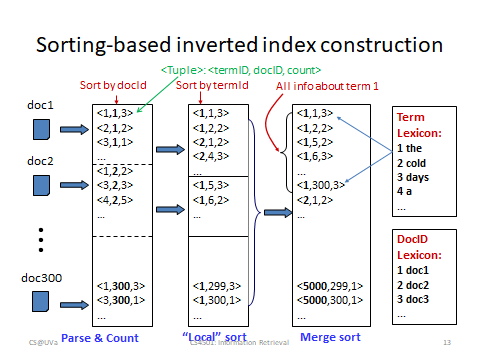

In [86]:
V = list()
D = list()

DTM = defaultdict(lambda:defaultdict(int))

for d in collection:
    i = len(D)
    D.append(i)
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith('N')]:
        if t not in V:
            V.append(t)
        j = V.index(t)
        DTM[i][j] += 1

In [87]:
len(DTM), len(DTM[0])

(35, 265)

In [88]:
TDM = defaultdict(lambda:defaultdict(int))

for i, terms in DTM.items():
    for j, f in terms.items():
        TDM[i][j] = f

In [89]:
for t, docs in TDM.items():
    for i, f in docs.items():
        print(V[j], D[i], f)

케이 0 5
케이 1 5
케이 2 6
케이 3 1
케이 4 1
케이 5 2
케이 6 2
케이 7 10
케이 8 2
케이 9 3
케이 10 1
케이 11 1
케이 12 1
케이 13 2
케이 14 2
케이 15 5
케이 16 3
케이 17 1
케이 18 5
케이 19 1
케이 20 1
케이 21 1
케이 22 1
케이 23 2
케이 24 1
케이 25 1
케이 26 2
케이 27 3
케이 28 1
케이 29 1
케이 30 1
케이 31 1
케이 32 1
케이 33 1
케이 34 1


IndexError: list index out of range

In [ ]:
V = list()
D = list()
dictionary = defaultdict(lambda : -1)
postings = list()

for d in collection:
    i = len(D)
    D.append(i)
    local_postings = defaultdict(int)
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith('N')]:
        if t not in V:
            V.append(t)
        j = V.index(t)
        next_position = dictionary[j]
        local_postings[j] += 1
        
    for j, f in local_postings.items():
        next_position = dictionary[j]
        _struct = (i, f, next_position)
        dictionary[j] = len(postings)
        postings.append(_struct)

In [ ]:
for i in range(len(V)):
    next_position = dictionary[j]
    while True:
        _struct = postings[next_position]
        next_position = _struct[2]
        print(V[j], D[_struct[0]], _struct[1])
        if next_position == -1:
            break

In [ ]:
/[]